## Problem Statment

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

### Aim

->To classify / predict whether a patient is prone to heart failure depending on multiple attributes.

->It is a binary classification with multiple numerical and categorical features.

### Dataset Attributes

Age : age of the patient [years]

Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP : resting blood pressure [mm Hg]

Cholesterol : serum cholesterol [mm/dl]

FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

Oldpeak : oldpeak = ST [Numeric value measured in depression]

ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease : output class [1: heart disease, 0: Normal]

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


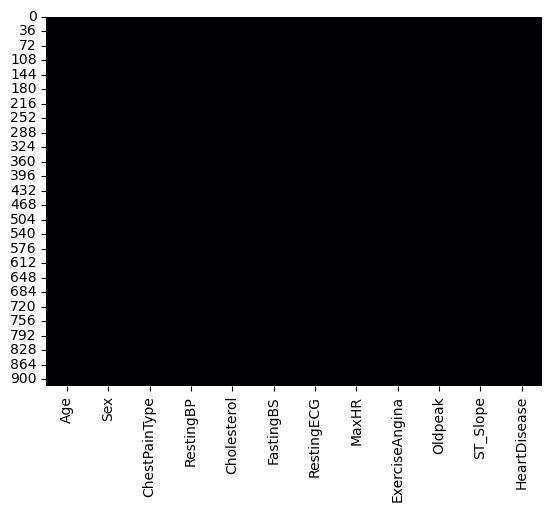

In [5]:
#check for null values
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


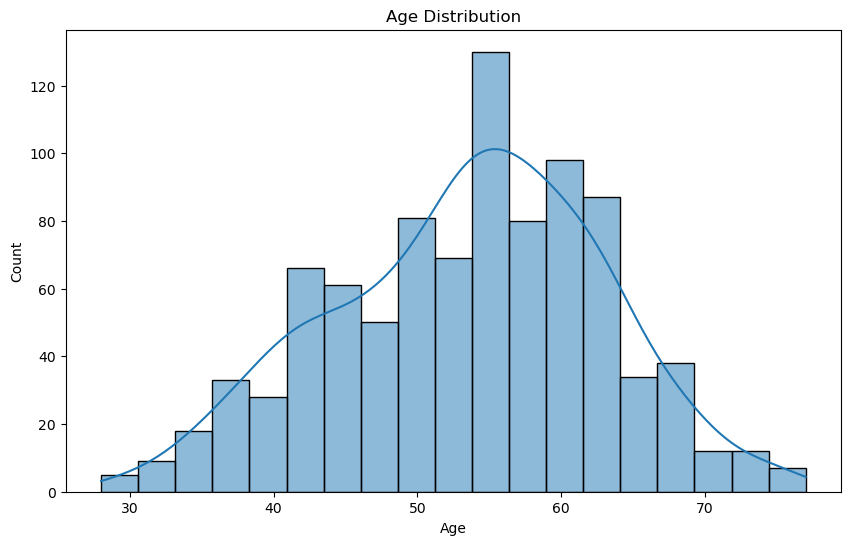

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

/var/folders/bl/p5tzjfvs3y58wy50thlq_87c0000gn/T/ipykernel_70069/229797298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


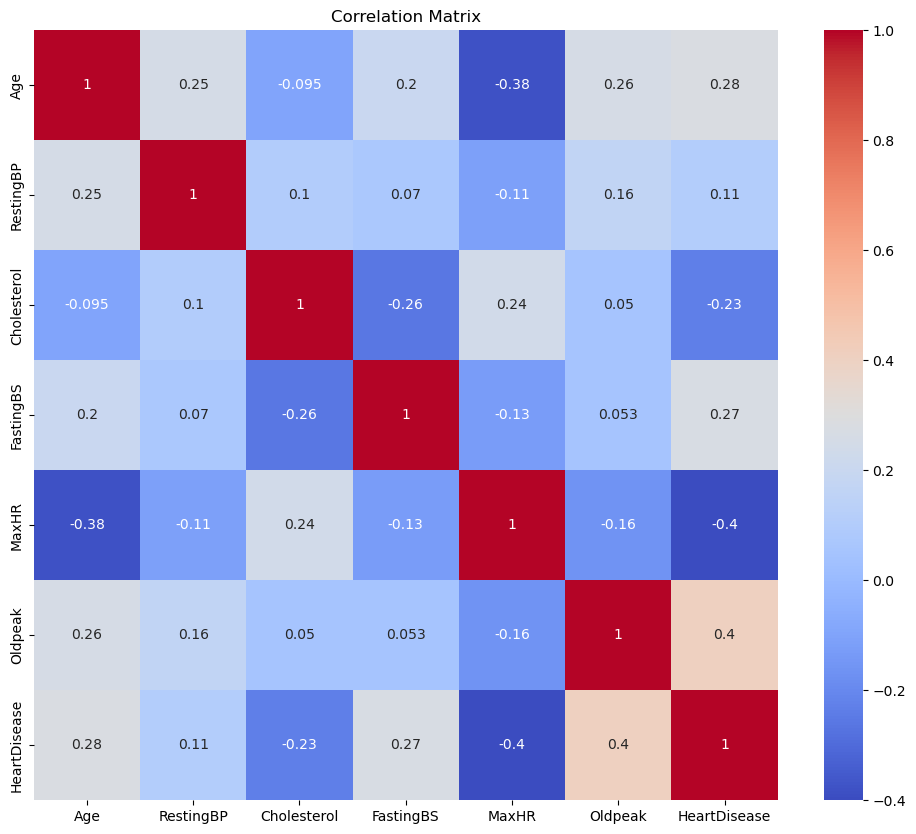

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

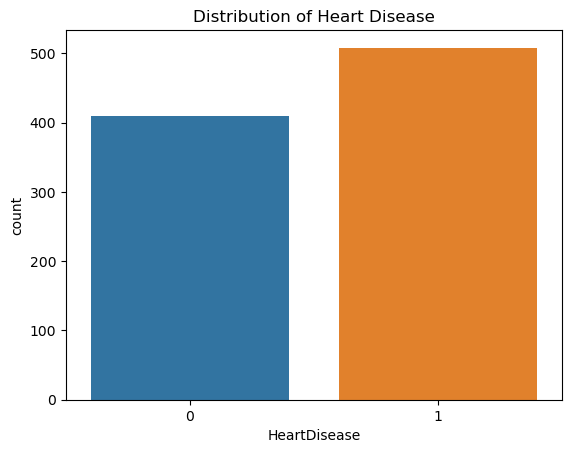

In [9]:
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

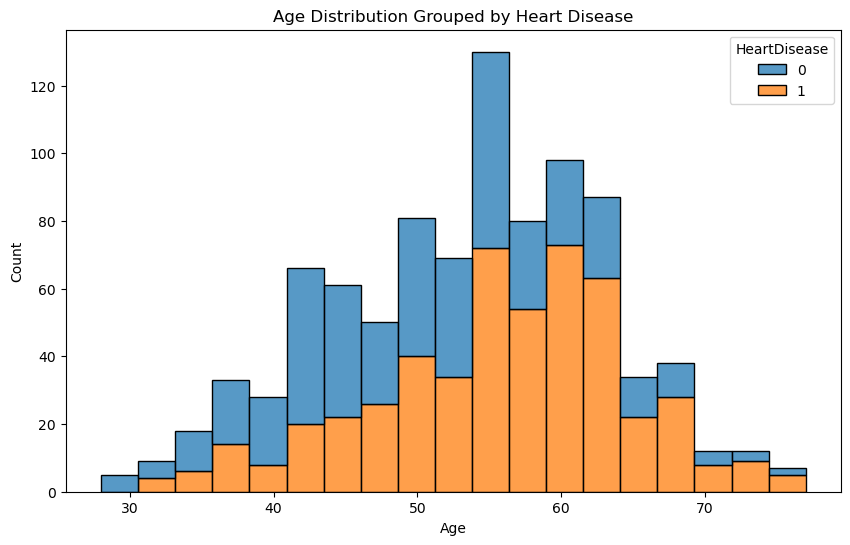

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack')
plt.title('Age Distribution Grouped by Heart Disease')
plt.show()

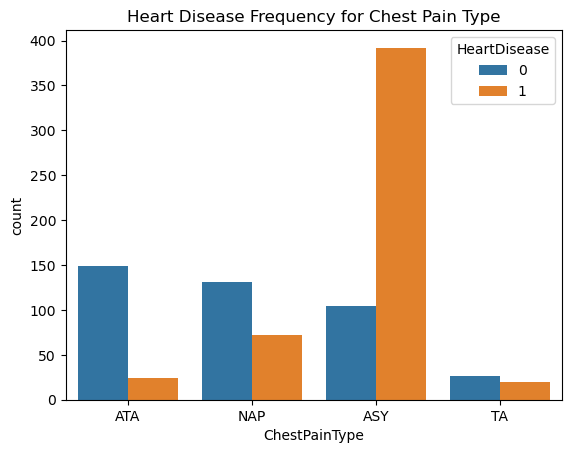

In [11]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.show()

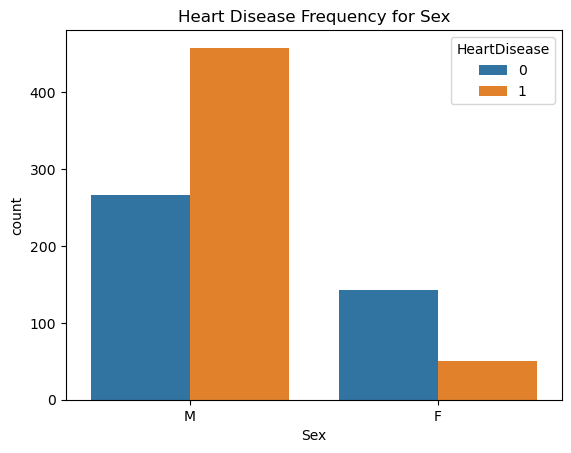

In [12]:
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for Sex')
plt.show()

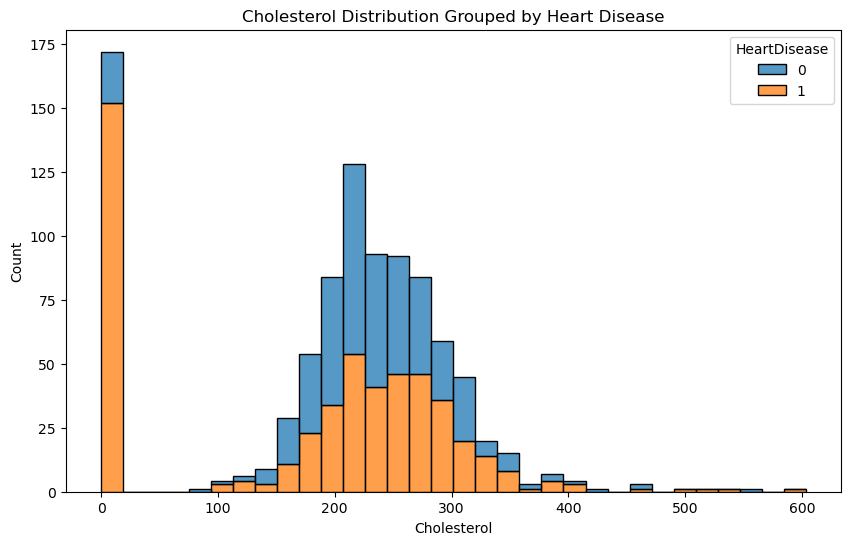

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Cholesterol', hue='HeartDisease', multiple='stack')
plt.title('Cholesterol Distribution Grouped by Heart Disease')
plt.show()

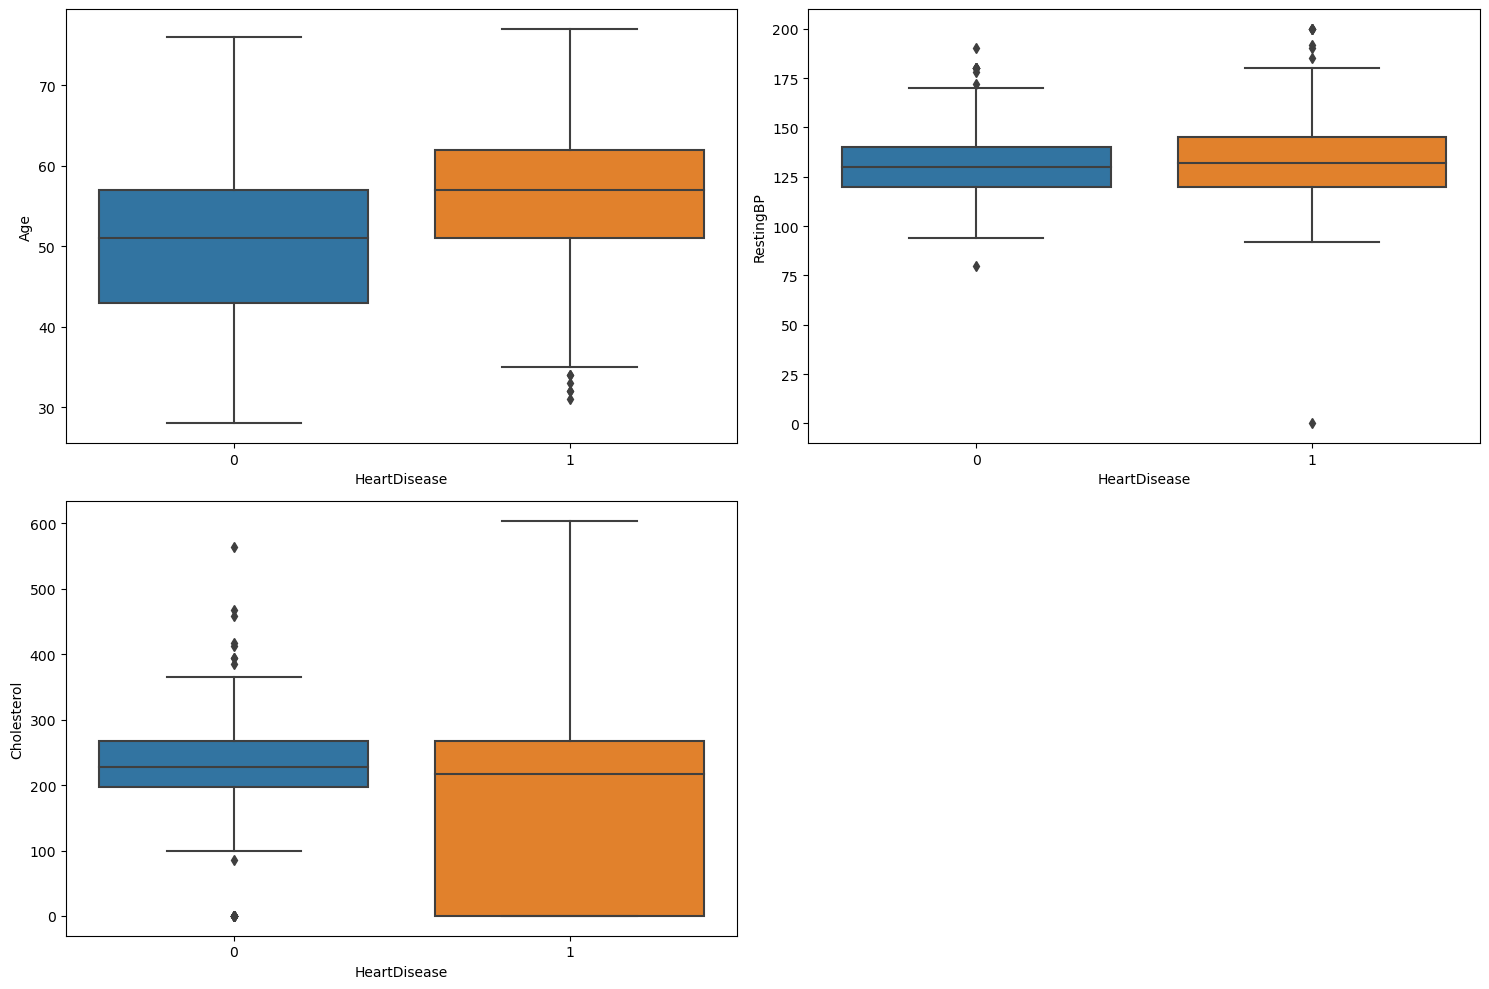

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'HeartDisease', y = 'Age', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'HeartDisease', y = 'RestingBP', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol', data = data)
plt.tight_layout()
plt.show()


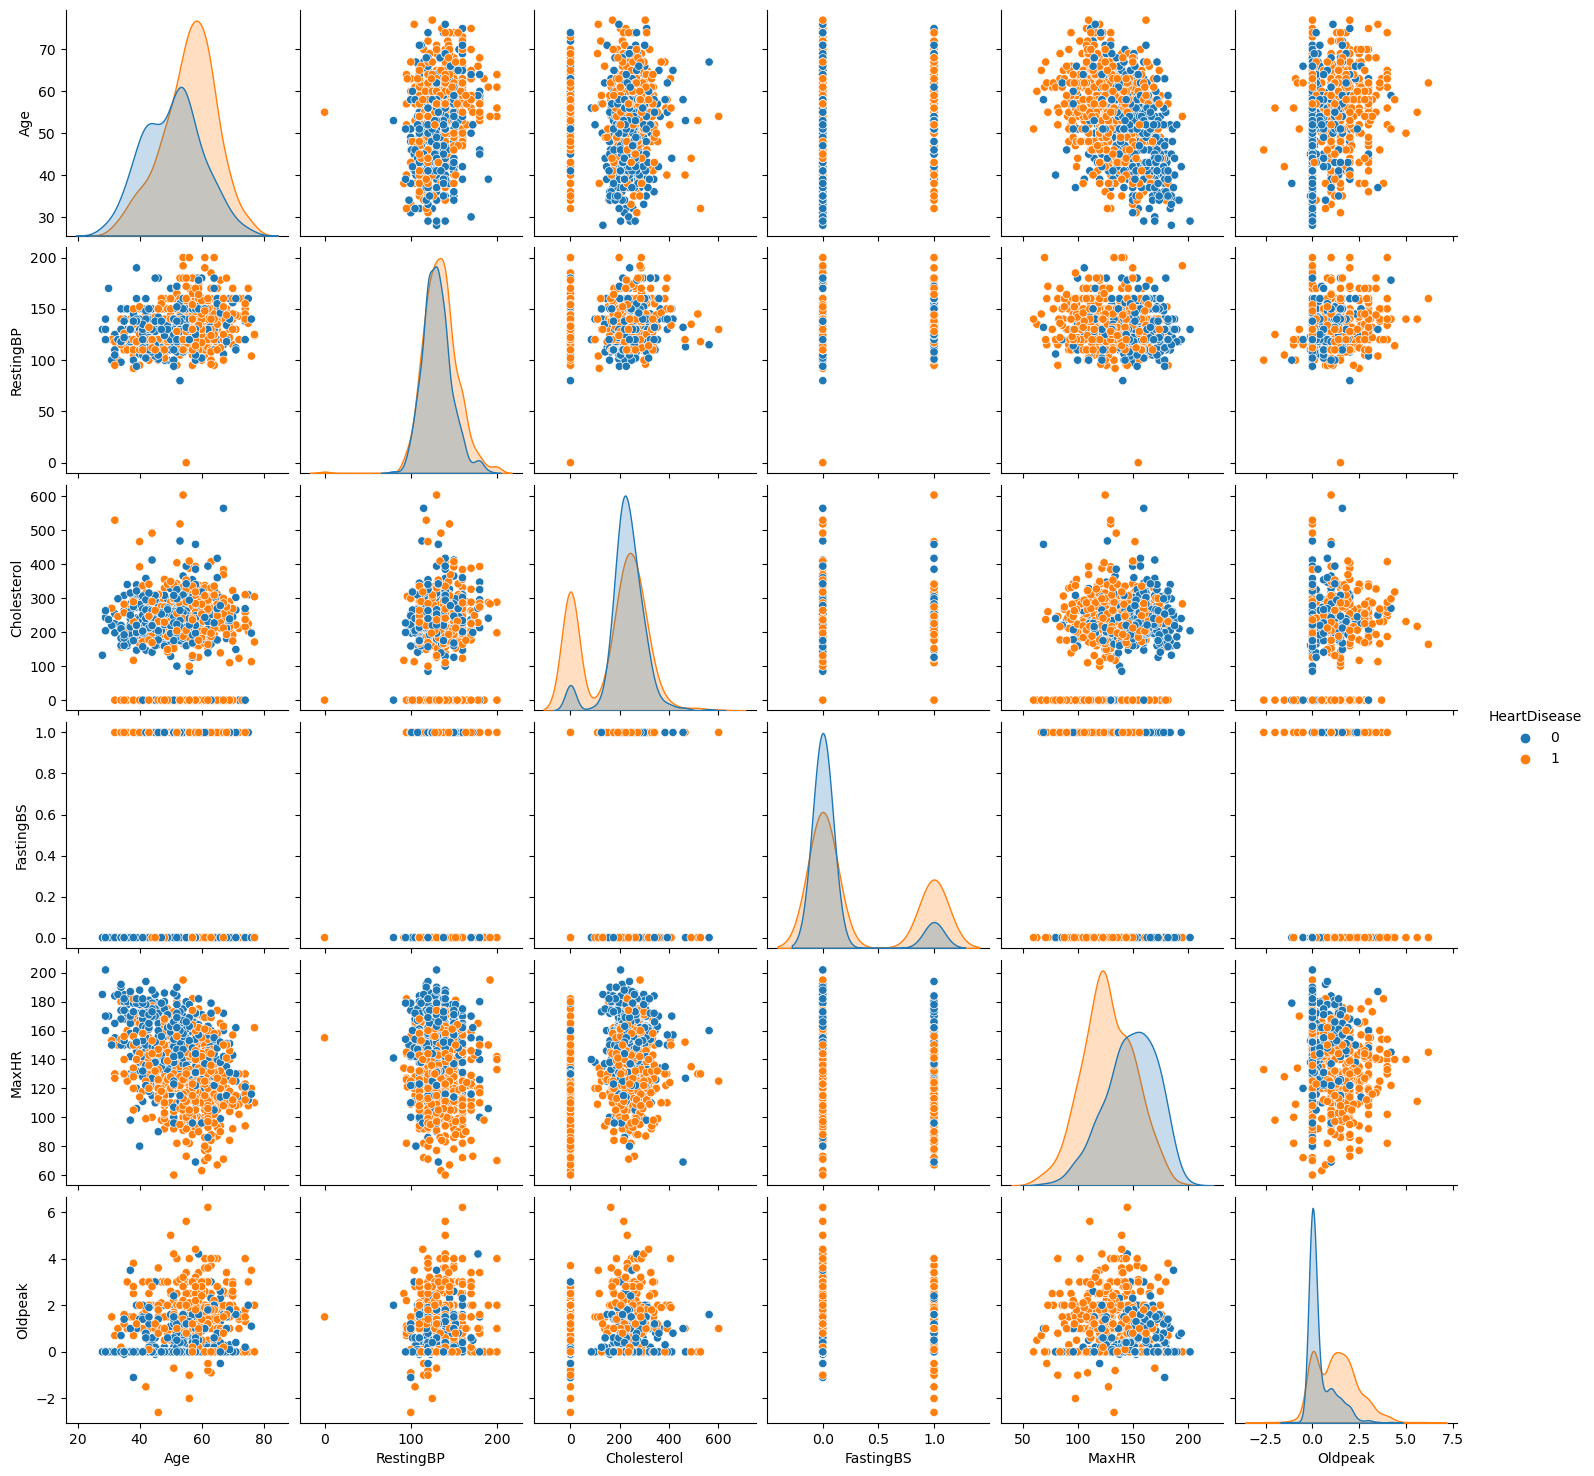

In [15]:
sns.pairplot(data, hue='HeartDisease')
plt.show()

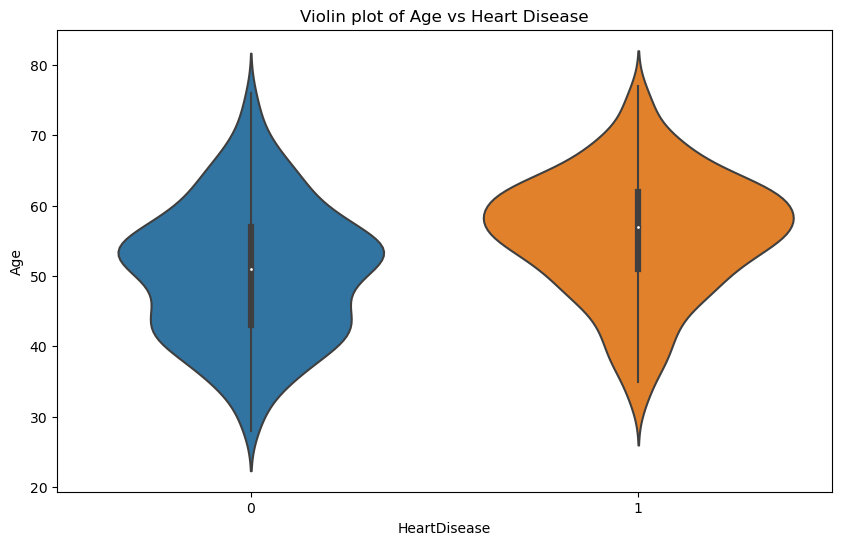

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(x="HeartDisease", y="Age", data=data)
plt.title('Violin plot of Age vs Heart Disease')
plt.show()

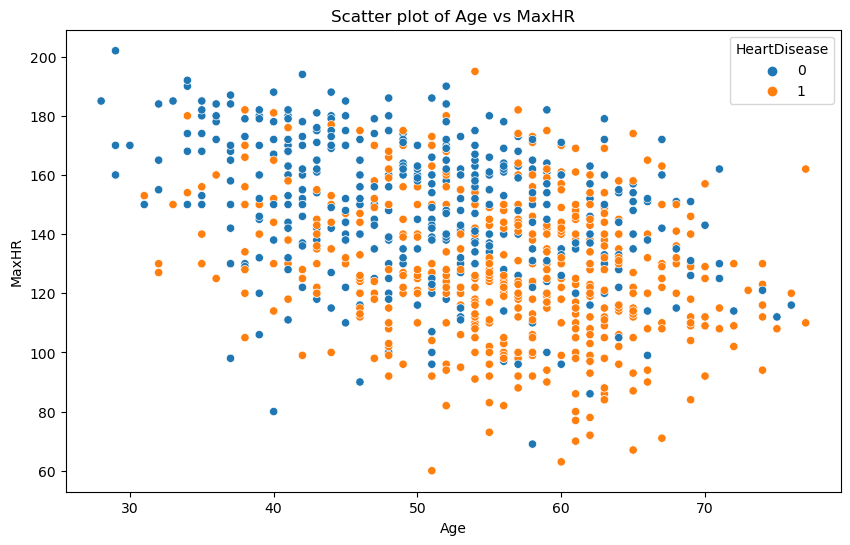

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=data)
plt.title('Scatter plot of Age vs MaxHR')
plt.show()

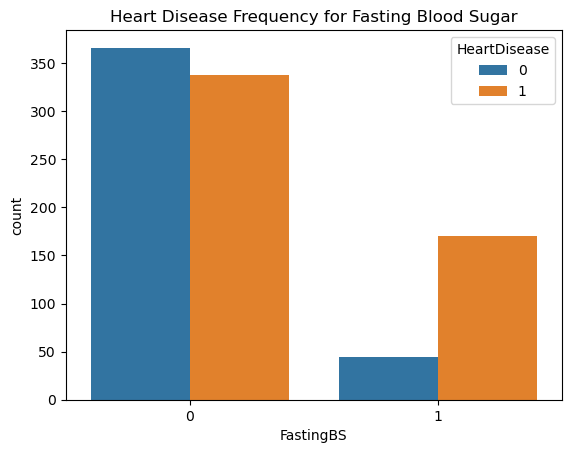

In [18]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for Fasting Blood Sugar')
plt.show()

In [19]:
pd.crosstab([data['Sex'], data['ChestPainType']], data['HeartDisease'], margins=True)

HeartDisease         0    1  All
Sex ChestPainType               
F   ASY             31   39   70
    ATA             56    4   60
    NAP             47    6   53
    TA               9    1   10
M   ASY             73  353  426
    ATA             93   20  113
    NAP             84   66  150
    TA              17   19   36
All                410  508  918

In [20]:
pd.crosstab([data['ST_Slope'], data['ChestPainType']], data['HeartDisease'], margins=True)

HeartDisease              0    1  All
ST_Slope ChestPainType               
Down     ASY              4   42   46
         ATA              2    1    3
         NAP              5    5   10
         TA               3    1    4
Flat     ASY             29  289  318
         ATA             14   18   32
         NAP             29   59   88
         TA               7   15   22
Up       ASY             71   61  132
         ATA            133    5  138
         NAP             97    8  105
         TA              16    4   20
All                     410  508  918

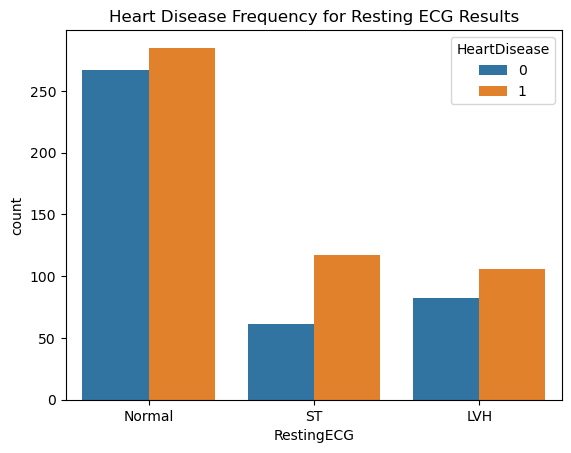

In [21]:
sns.countplot(x='RestingECG', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for Resting ECG Results')
plt.show()

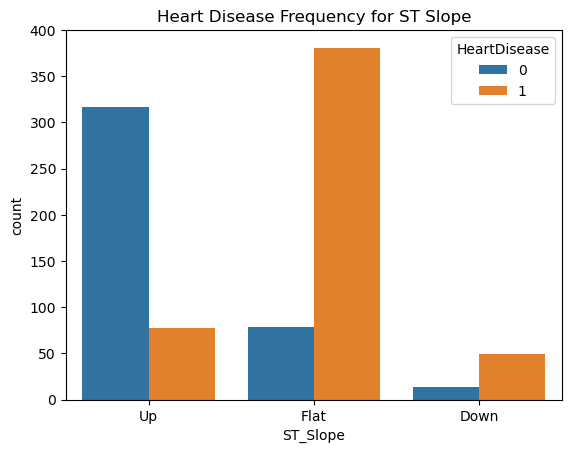

In [22]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for ST Slope')
plt.show()

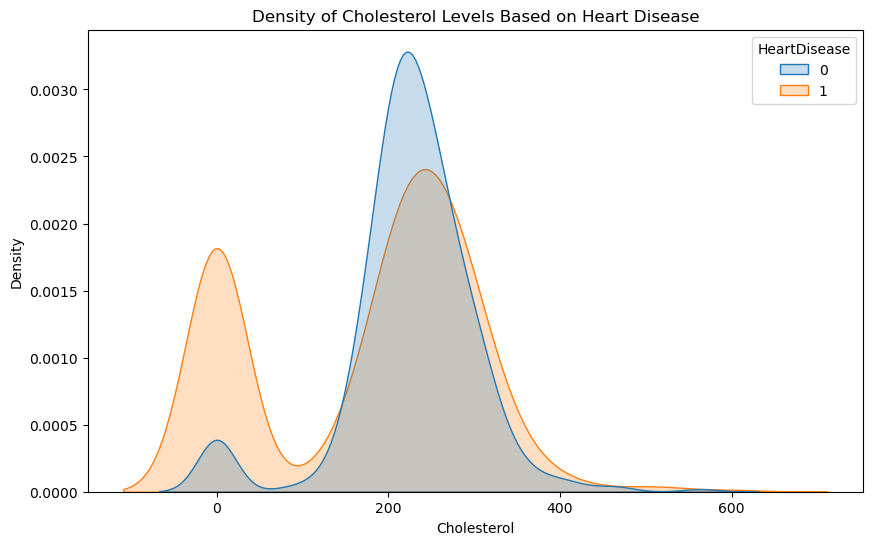

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x="Cholesterol", hue="HeartDisease", fill=True)
plt.title('Density of Cholesterol Levels Based on Heart Disease')
plt.show()

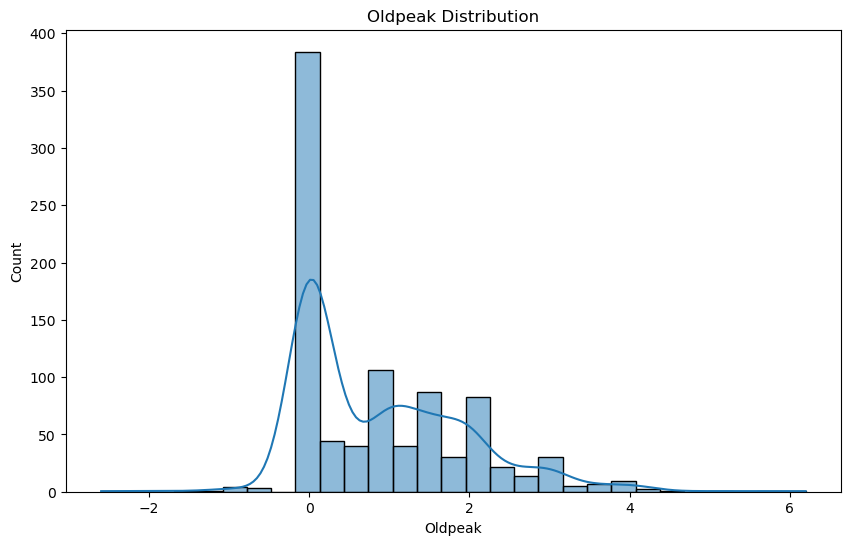

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data['Oldpeak'], kde=True)
plt.title('Oldpeak Distribution')
plt.show()

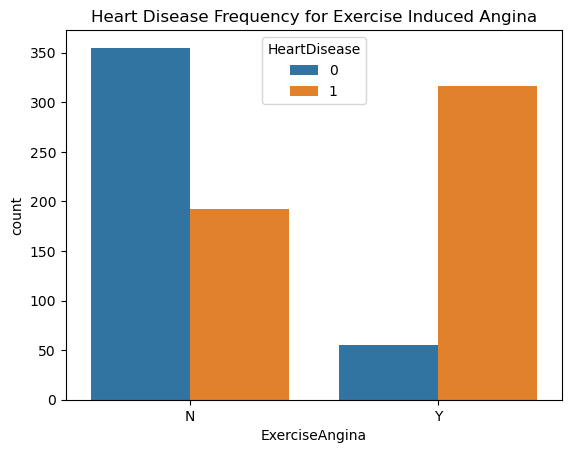

In [25]:
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)
plt.title('Heart Disease Frequency for Exercise Induced Angina')
plt.show()

In [26]:
col = list(data.columns)
colors = ['#F93822','#FDD20E']
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [28]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


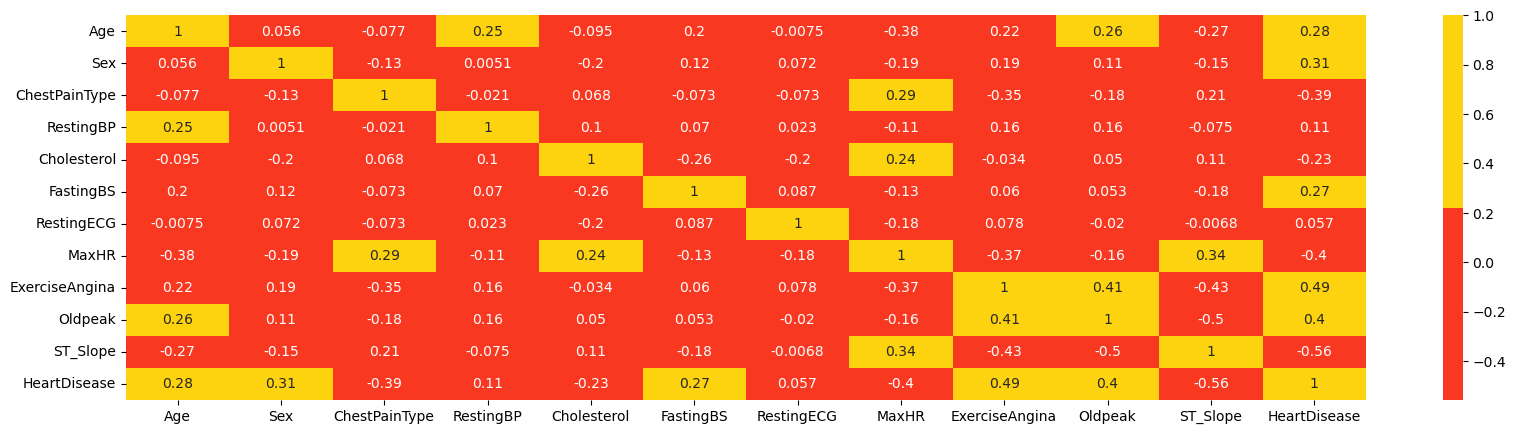

In [29]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

#### It is a huge matrix with too many features. We will check the correlation only with respect to HeartDisease

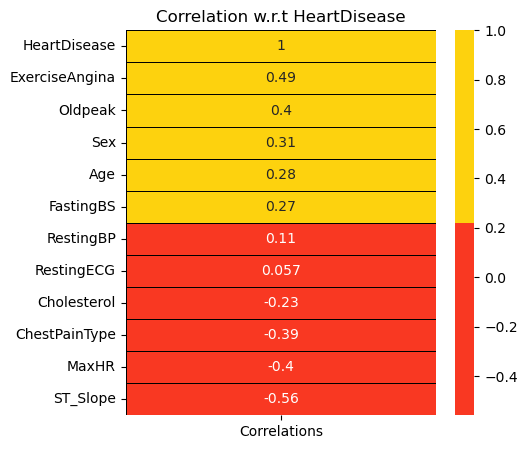

In [30]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

##### Except for RestingBP and RestingECG, everyone displays a positive or negative relationship with HeartDisease

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

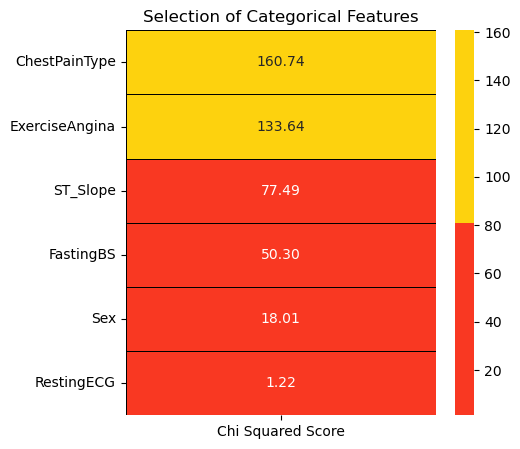

In [32]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

#### Except RestingECG, all the remaining categorical features are pretty important for predicting heart diseases.

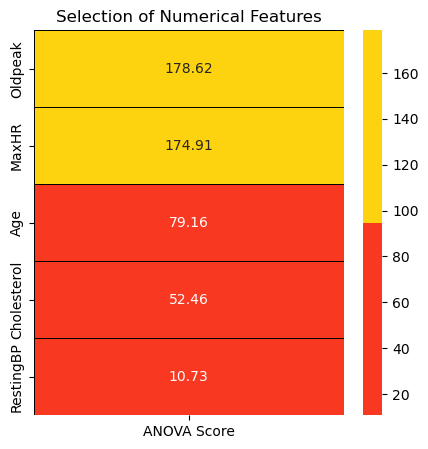

In [33]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

#### We will leave out RestingBP from the modeling part and take the remaining features.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)

def model(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy: ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)
    
    # Plot ROC curve using matplotlib
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def model_evaluation(classifier):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))


##### 1] Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Accuracy:  87.50%
Cross Validation Score:  91.12%
ROC_AUC Score:  87.43%


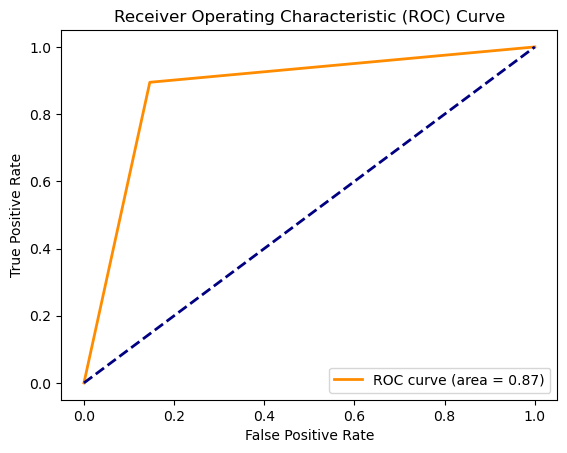

In [42]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



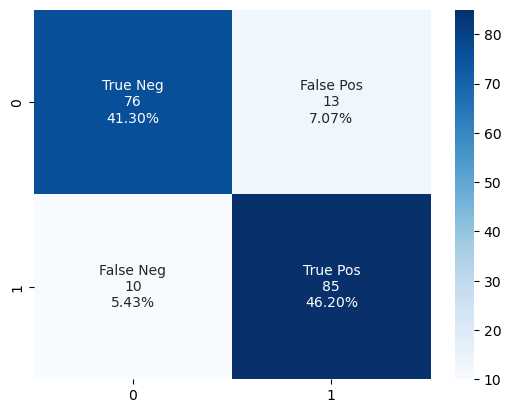

In [43]:
model_evaluation(classifier_lr)

##### 2) SVC

In [44]:
from sklearn.svm import SVC

In [45]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy:  87.50%
Cross Validation Score:  90.53%
ROC_AUC Score:  87.43%


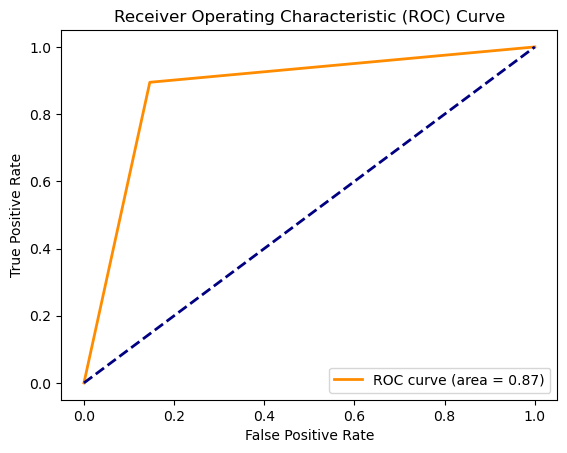

In [46]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



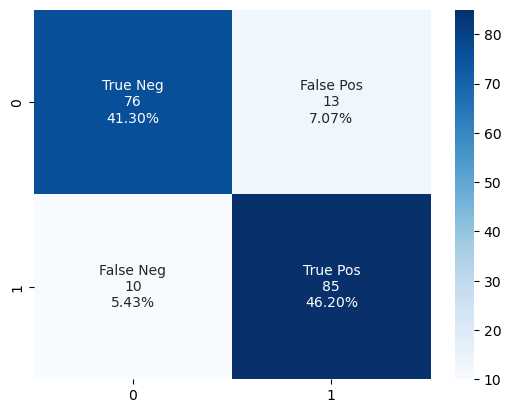

In [47]:
model_evaluation(classifier_svc)

##### 3) Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy:  84.78%
Cross Validation Score:  89.09%
ROC_AUC Score:  84.62%


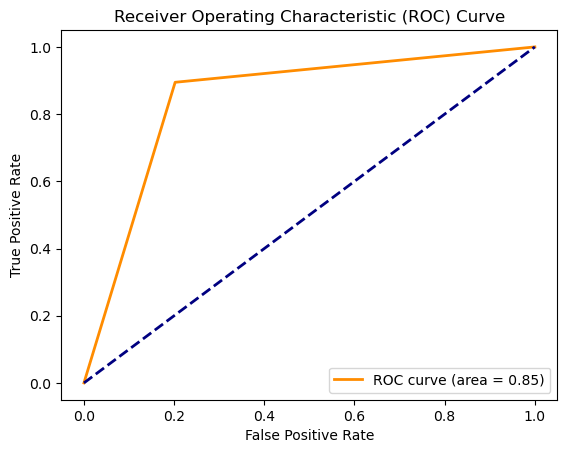

In [50]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



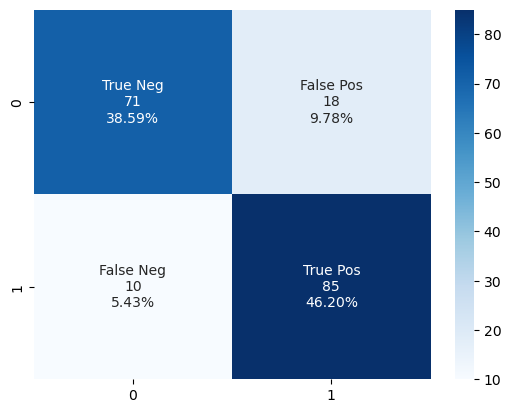

In [51]:
model_evaluation(classifier_dt)

##### 4) Random Forest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy:  84.24%
Cross Validation Score:  92.91%
ROC_AUC Score:  84.06%


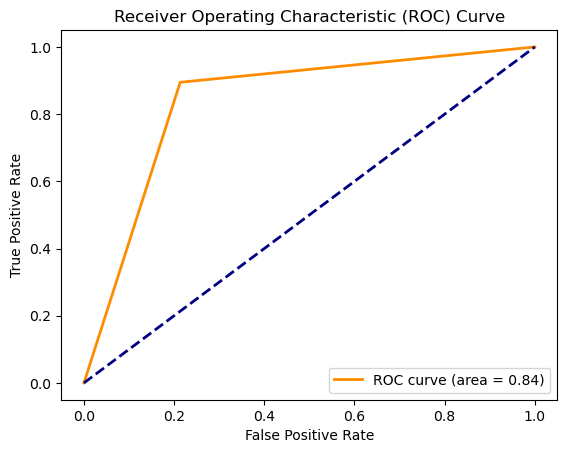

In [54]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



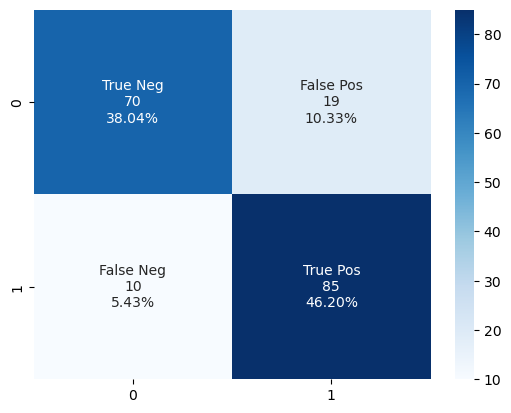

In [55]:
model_evaluation(classifier_rf)

##### 5) k - nearest neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy:  81.52%
Cross Validation Score:  89.34%
ROC_AUC Score:  81.36%


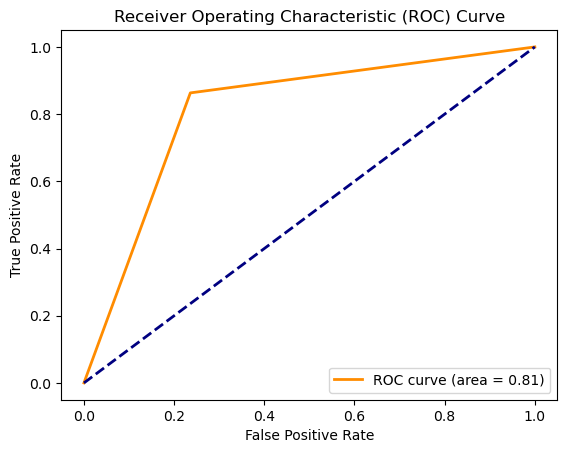

In [58]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



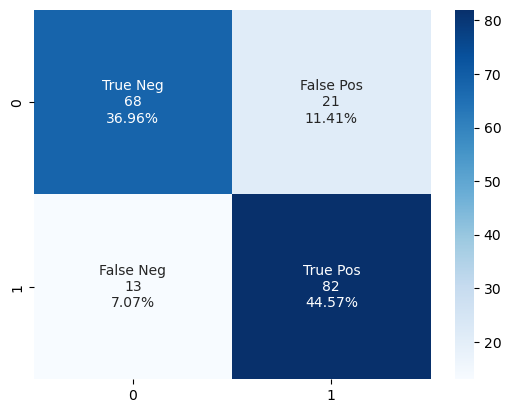

In [59]:
model_evaluation(classifier_knn)

<h4>Alogrithm Results Table :</h4>

<left>
<table align = "left">
    <tr>
        <td>Sr.No.</td>	<td>ML Algorithm</td>	<td>Accuracy</td>	<td>Cross Validation Score</td>	<td>ROC AUC Score</td></tr>
    <tr><td>1</td>	<td>Logistic Regression</td>	<td>87.50%</td>	<td>91.12%</td>	<td>87.43%</td></tr>
<tr><td>2</td>	<td>Support Vector Classifier</td>	<td>87.50%</td>	<td>90.53%</td>	<td>87.43%</td></tr>
    <tr><td>3</td><td>	Decision Tree Classifier</td>	<td>84.78%</td><td>	89.09%</td><td>	84.62%</td></tr>
<tr><td>4</td>	<td>Random Forest Classifier</td>	<td>84.24%</td>	<td>92.91%</td>	<td>84.06%</td></tr>
<tr><td>5</td>	<td>K-Nearest Neighbors Classfier</td>	<td>81.52%</td>	<td>89.34%</td>	<td>81.36%</td></tr>
    </table>
    </left>

##### Conclusion

-For this problem, outlier detection was not done as I was not able to read any papers about heart diseases. It becomes a pivotal part to understand the subject before removing outliers even though the outlier detection tests come out positive.<br>
-Visualization is key. It makes the data talkative. Displaying the present information and results of any tests or output through visualization becomes crucial as it makes the understanding easy.<br>
-For modeling, hyperparameter tuning is not done. It can push the performances of the algorithms. Overall the algorithm performances are good.